In [6]:
from gensim.models.fasttext import FastText
import numpy as np
import matplotlib.pyplot as plt
import nltk
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk import WordPunctTokenizer

import re

import wikipedia
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

%matplotlib inline

[nltk_data] Downloading package punkt to /home/cst/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/cst/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/cst/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
artificial_intelligence = wikipedia.page("Artificial Intelligence").content
machine_learning = wikipedia.page("Machine Learning").content
deep_learning = wikipedia.page("Deep Learning").content
neural_network = wikipedia.page("Neural Network").content

artificial_intelligence = sent_tokenize(artificial_intelligence)
machine_learning = sent_tokenize(machine_learning)
deep_learning = sent_tokenize(deep_learning)
neural_network = sent_tokenize(neural_network)

artificial_intelligence.extend(machine_learning)
artificial_intelligence.extend(deep_learning)
artificial_intelligence.extend(neural_network)

In [8]:
stemmer = WordNetLemmatizer()

def preprocess_text(document):
        # Remove all the special characters
        document = re.sub(r'\W', ' ', str(document))

        # remove all single characters
        document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

        # Remove single characters from the start
        document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)

        # Substituting multiple spaces with single space
        document = re.sub(r'\s+', ' ', document, flags=re.I)

        # Removing prefixed 'b'
        document = re.sub(r'^b\s+', '', document)

        # Converting to Lowercase
        document = document.lower()

        # Lemmatization
        tokens = document.split()
        tokens = [stemmer.lemmatize(word) for word in tokens]
        tokens = [word for word in tokens if word not in en_stop]
        tokens = [word for word in tokens if len(word) > 3]

        preprocessed_text = ' '.join(tokens)

        return preprocessed_text

In [9]:
sent = preprocess_text("Artificial intelligence, is the most advanced technology of the present era")
print(sent)


final_corpus = [preprocess_text(sentence) for sentence in artificial_intelligence if sentence.strip() !='']

word_punctuation_tokenizer = nltk.WordPunctTokenizer()
word_tokenized_corpus = [word_punctuation_tokenizer.tokenize(sent) for sent in final_corpus]


artificial intelligence advanced technology present


In [10]:
embedding_size = 60
window_size = 40
min_word = 5
down_sampling = 1e-2

In [11]:
%%time
ft_model = FastText(word_tokenized_corpus,
                      size=embedding_size,
                      window=window_size,
                      min_count=min_word,
                      sample=down_sampling,
                      sg=1,
                      iter=100)

CPU times: user 35.5 s, sys: 1.44 s, total: 37 s
Wall time: 25.8 s


In [12]:
print(ft_model.wv['artificial'])

[-0.40005922  0.06829882 -0.37139618 -0.05747772 -0.21012521  0.6264766
 -0.5487409   0.23739998  0.00264965 -0.20744413 -0.0617466  -0.45886692
  0.31687817  0.41458526 -0.3646891  -0.63285005 -0.42225736 -0.27448797
  0.26313913  0.11133512  0.19684565  0.03470264  0.14556497  0.10464121
  0.33057493 -0.30375564  0.3560109   0.0321326   0.53450936  0.40359926
 -0.3406229   0.05196159  0.10020238 -0.30838618  0.0566899   0.05483052
  0.06558045 -0.3234435   0.08243135  0.04355745  0.06914943 -0.10778602
 -0.19101119 -0.10054481  0.18400049  0.494376    0.3262242   0.1980118
 -0.10200933 -0.48788413 -0.20159426  0.26452443 -0.1806202   0.10930063
 -0.08349478 -0.28006256  0.04189992 -0.46617112  0.11046639 -0.57219964]


In [13]:
semantically_similar_words = {words: [item[0] for item in ft_model.wv.most_similar([words], topn=5)]
                  for words in ['artificial', 'intelligence', 'machine', 'network', 'recurrent', 'deep']}

for k,v in semantically_similar_words.items():
    print(k+":"+str(v))

artificial:['intelligence', 'neuron', 'simulate', 'simulated', 'moral']
intelligence:['artificial', 'intelligent', 'moravec', 'simulation', 'simulate']
machine:['learning', 'ethic', 'method', 'intelligence', 'source']
network:['neural', 'recurrent', 'biological', 'convolutional', 'deep']
recurrent:['network', 'neural', 'feedforward', 'convolutional', 'shallow']
deep:['generative', 'speech', 'convolutional', 'cnns', 'belief']


In [14]:
print(ft_model.wv.similarity(w1='artificial', w2='intelligence'))

0.738039


In [15]:
from sklearn.decomposition import PCA

all_similar_words = sum([[k] + v for k, v in semantically_similar_words.items()], [])

print(all_similar_words)
print(type(all_similar_words))
print(len(all_similar_words))

['artificial', 'intelligence', 'neuron', 'simulate', 'simulated', 'moral', 'intelligence', 'artificial', 'intelligent', 'moravec', 'simulation', 'simulate', 'machine', 'learning', 'ethic', 'method', 'intelligence', 'source', 'network', 'neural', 'recurrent', 'biological', 'convolutional', 'deep', 'recurrent', 'network', 'neural', 'feedforward', 'convolutional', 'shallow', 'deep', 'generative', 'speech', 'convolutional', 'cnns', 'belief']
<class 'list'>
36


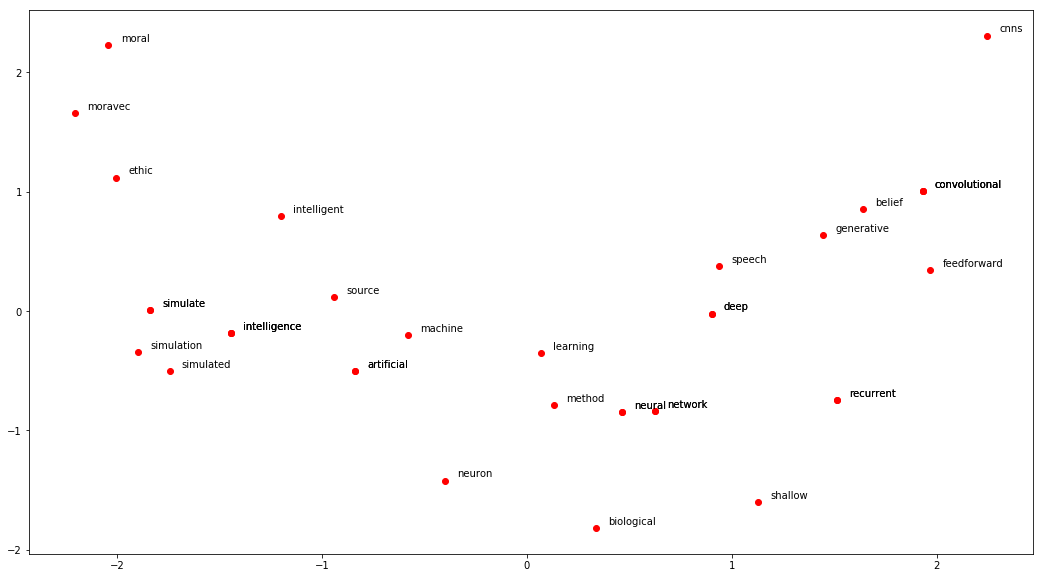

In [16]:
word_vectors = ft_model.wv[all_similar_words]

pca = PCA(n_components=2)

p_comps = pca.fit_transform(word_vectors)
word_names = all_similar_words

plt.figure(figsize=(18, 10))
plt.scatter(p_comps[:, 0], p_comps[:, 1], c='red')

for word_names, x, y in zip(word_names, p_comps[:, 0], p_comps[:, 1]):
    plt.annotate(word_names, xy=(x+0.06, y+0.03), xytext=(0, 0), textcoords='offset points')

Download the dataset from 
- https://www.kaggle.com/yelp-dataset/yelp-dataset/version/4?select=yelp_review.csv
- https://www.kaggle.com/luisfredgs/yelp-reviews-csv

In [20]:
import pandas as pd

data = pd.read_csv('data/yelp_review.csv')

In [21]:
data.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


In [23]:
data['stars'].value_counts()

5    2253347
4    1223316
1     731363
3     615481
2     438161
Name: stars, dtype: int64

In [25]:
import numpy as np

data['reviews_score'] = np.where(data['stars']>=3,'positive','negative')

In [26]:
col = ['reviews_score', 'text']

yelp_reviews = data[col]
yelp_reviews['reviews_score']=['__label__'+ s for s in yelp_reviews['reviews_score']]
yelp_reviews['text']= yelp_reviews['text'].replace('\n',' ', regex=True).replace('\t',' ', regex=True)
yelp_reviews.to_csv(r'data/yelp_reviews_updated.txt', index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")

/home/cst/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/cst/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


NameError: name 'csv' is not defined

In [ ]:
yelp_reviews.head()